# Upper Confidence Bound template

## ==== import the dateset ========

In [41]:
import pandas as pd
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## ======== How Random Selection performs? ========

### ====== Implement Random Selection =======

In [42]:
import random
num_ads = 10
ads_selected = []
total_reward = 0
for i in range(dataset.shape[0]):
    ad = random.randrange(num_ads)
    ads_selected.append(ad)
    total_reward += dataset.iloc[i, ad]
print ('Random Selection gets reward:', total_reward)

Random Selection gets reward: 1261


### ======= Visualize ========

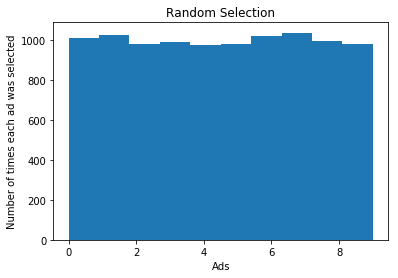

In [43]:
import matplotlib.pyplot as plt
plt.hist(ads_selected)
plt.title('Random Selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

## ======= How UCB performs? ========

### ===== Implement UCB ======

In [44]:
import math
ads_selected = [0]*num_ads
rewards = [0]*num_ads
upper_bound = [0] *num_ads
ads = []
### To avoid zero occurrence of the ads         
for i in range(num_ads):
    ads_selected[i] += 1
    rewards[i] += dataset.iloc[i, i]
    ads.append(i)
### Now UCB algorithm
for each_round in range(num_ads, dataset.shape[0]):
    for i in range(num_ads):
        upper_bound[i] = rewards[i]*1.0/ads_selected[i] + math.sqrt(1.5*math.log(each_round+1)/ads_selected[i])
    
    ad = upper_bound.index(max(upper_bound))
    ads_selected[ad] += 1
    rewards[ad] += dataset.iloc[each_round, ad]
    ads.append(ad) 
print ('UCB gets reward:', sum(rewards))

UCB gets reward: 2178


### ======= Visualize ========

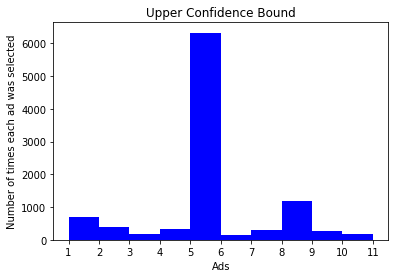

In [48]:
import numpy as np
plt.hist(ads, bins = np.arange(0, 11, 1), color = 'blue')
plt.xticks(np.arange(0, 11), [str(i) for i in range(1, 12)])
plt.title('Upper Confidence Bound')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()